##Instalando dependencias 


In [1]:
 !pip install 'fsspec>=0.3.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Imports


In [3]:
import shap
import dask.dataframe as dd
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.


In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls "/content/drive/My Drive"

'A lot of things'   Curriculo		    Obra       UFOP
 Certificados	    ImersaoDev_Alura	    Pictures   Wizard
'Colab Notebooks'  'Iniciação Científica'   PS


##Verificando dataset

In [6]:
df = dd.read_csv('/content/drive/MyDrive/Colab Notebooks/IC/eccomerce/database/dataframes/olist_new_df.csv')

In [7]:
df = df.compute()

In [8]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,customer_unique_id,...,seller_lat,seller_lng,days_to_delivery,early_delivery,day_shipping,month_shipping,year_shipping,day_order_approved,month_order_approved,year_order_approved
0,0.0,1.0,8216.0,812.0,58.9,13.29,1.0,2.0,72.19,48076.0,...,-22.497188,-44.127324,6.0,10.0,19.0,9.0,2017.0,13.0,9.0,2017.0
1,7014.0,1.0,8216.0,812.0,55.9,17.96,0.0,1.0,73.86,5649.0,...,-22.497188,-44.127324,6.0,21.0,5.0,7.0,2017.0,29.0,6.0,2017.0
2,30559.0,1.0,8216.0,812.0,64.9,18.33,1.0,2.0,83.23,18589.0,...,-22.497188,-44.127324,5.0,15.0,23.0,5.0,2018.0,18.0,5.0,2018.0
3,40954.0,1.0,8216.0,812.0,58.9,16.17,1.0,3.0,75.07,82561.0,...,-22.497188,-44.127324,1.0,23.0,7.0,8.0,2017.0,1.0,8.0,2017.0
4,45875.0,1.0,8216.0,812.0,58.9,13.29,1.0,4.0,72.19,4247.0,...,-22.497188,-44.127324,1.0,21.0,16.0,8.0,2017.0,10.0,8.0,2017.0


In [9]:
df = df.drop(['early_delivery'], 1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [10]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,customer_unique_id,...,costumer_lng,seller_lat,seller_lng,days_to_delivery,day_shipping,month_shipping,year_shipping,day_order_approved,month_order_approved,year_order_approved
0,0.0,1.0,8216.0,812.0,58.9,13.29,1.0,2.0,72.19,48076.0,...,-41.310265,-22.497188,-44.127324,6.0,19.0,9.0,2017.0,13.0,9.0,2017.0
1,7014.0,1.0,8216.0,812.0,55.9,17.96,0.0,1.0,73.86,5649.0,...,-51.717167,-22.497188,-44.127324,6.0,5.0,7.0,2017.0,29.0,6.0,2017.0
2,30559.0,1.0,8216.0,812.0,64.9,18.33,1.0,2.0,83.23,18589.0,...,-43.976106,-22.497188,-44.127324,5.0,23.0,5.0,2018.0,18.0,5.0,2018.0
3,40954.0,1.0,8216.0,812.0,58.9,16.17,1.0,3.0,75.07,82561.0,...,-49.124988,-22.497188,-44.127324,1.0,7.0,8.0,2017.0,1.0,8.0,2017.0
4,45875.0,1.0,8216.0,812.0,58.9,13.29,1.0,4.0,72.19,4247.0,...,-43.776331,-22.497188,-44.127324,1.0,16.0,8.0,2017.0,10.0,8.0,2017.0


##Preparação dos dados


In [11]:
df.isnull().sum()

order_id                 0
order_item_id            0
product_id               0
seller_id                0
price                    0
freight_value            0
payment_type             0
payment_installments     0
payment_value            0
customer_unique_id       0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
costumer_lat             0
costumer_lng             0
seller_lat               0
seller_lng               0
days_to_delivery         0
day_shipping             0
month_shipping           0
year_shipping            0
day_order_approved       0
month_order_approved     0
year_order_approved      0
dtype: int64

In [12]:
df = df.astype(float)

In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [14]:
df = df.fillna(0) #Add this line

In [15]:
colunas = ['Modelo','MAE'] 
Metrics = pd.DataFrame(columns = colunas)

In [16]:
Metrics

,Modelo,MAE


In [17]:
##separando as variaveis dependente e independente em dois data frames
X = df.drop(['days_to_delivery'], 1)
y = df['days_to_delivery']

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [18]:
# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [19]:
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True, random_state=150)

#Modelos


##LinearRegression


In [20]:
model = LinearRegression()

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error'}

scores = cross_validate(my_pipeline, 
                        X_train, Y_train,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'LinearRegression',
             'MAE'        : -1*np.mean(scores['test_mae'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [21]:
Metrics

,Modelo,MAE
0,LinearRegression,1.988747


In [22]:
explainer = shap.Explainer(model = model.fit(X,y), masker = X)

In [23]:
shap_values = explainer(X)

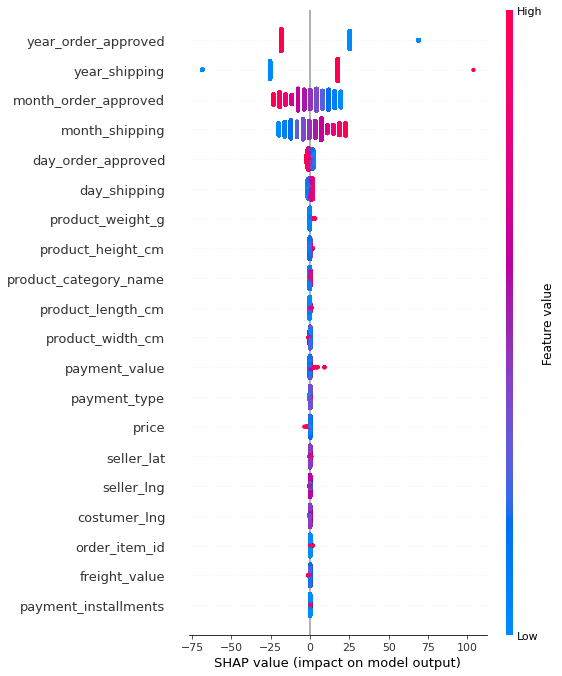

In [24]:
shap.summary_plot(shap_values, X)

##Decision Tree

In [25]:
model = DecisionTreeRegressor(random_state=150, min_samples_split=0.01)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error'}

scores = cross_validate(my_pipeline, 
                        X_train, Y_train,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Decision Tree',
             'MAE'        : -1*np.mean(scores['test_mae'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [26]:
Metrics

,Modelo,MAE
0,LinearRegression,1.988747
1,Decision Tree,1.893243


In [27]:
explainer = shap.Explainer(model = model.fit(X,y), masker = X)
shap_values = explainer(X)

 96%|=================== | 107188/111237 [00:24<00:00]       

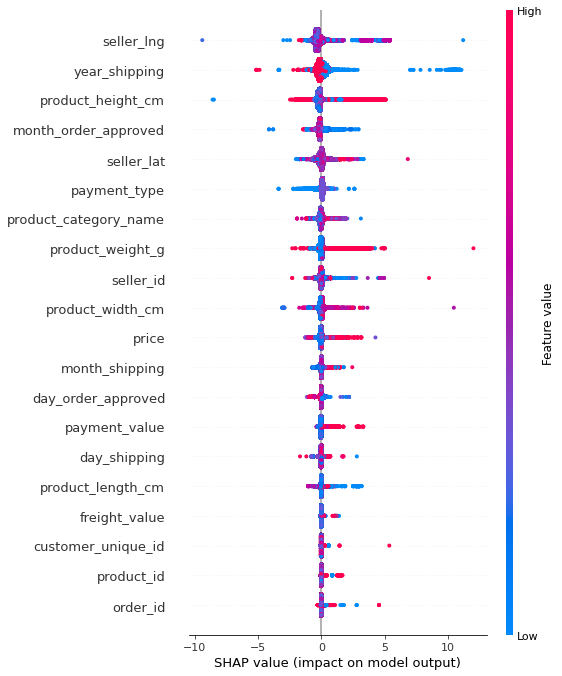

In [28]:
shap.summary_plot(shap_values, X)

##Random Forest

In [29]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error'}

scores = cross_validate(my_pipeline, 
                        X_train, Y_train,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Random Forest',
             'MAE'        : -1*np.mean(scores['test_mae'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [30]:
Metrics

,Modelo,MAE
0,LinearRegression,1.988747
1,Decision Tree,1.893243
2,Random Forest,1.956908


In [31]:
explainer = shap.Explainer(model = model.fit(X,y), masker = X)
shap_values = explainer(X)

 99%|===================| 110468/111237 [02:22<00:00]       

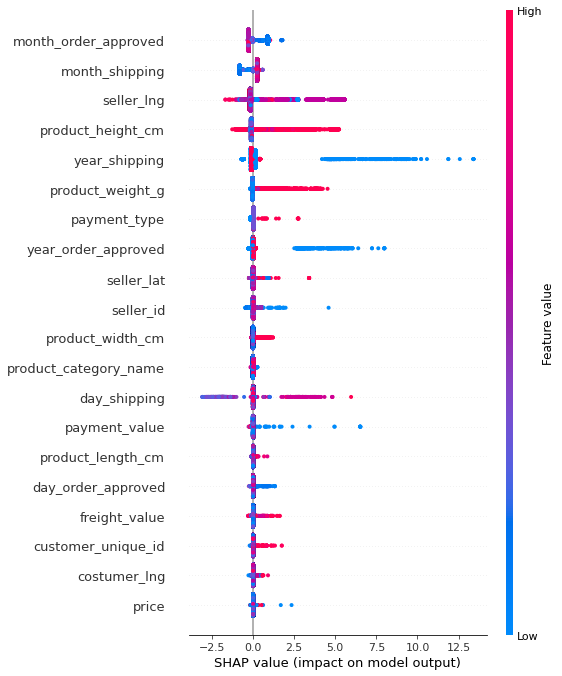

In [32]:
shap.summary_plot(shap_values, X)

##XGBoost


In [33]:
model = xgb.XGBRegressor(silent = True)

my_pipeline = Pipeline(steps=[('m', model)])

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error'}

scores = cross_validate(my_pipeline, 
                        X_train, Y_train,
                        cv=kf,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'XGB',
             'MAE'        : -1*np.mean(scores['test_mae'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [34]:
Metrics

,Modelo,MAE
0,LinearRegression,1.988747
1,Decision Tree,1.893243
2,Random Forest,1.956908
3,XGB,1.855939


In [35]:
model.fit(X,y)

explainer = shap.Explainer(model)
shap_values = explainer(X)

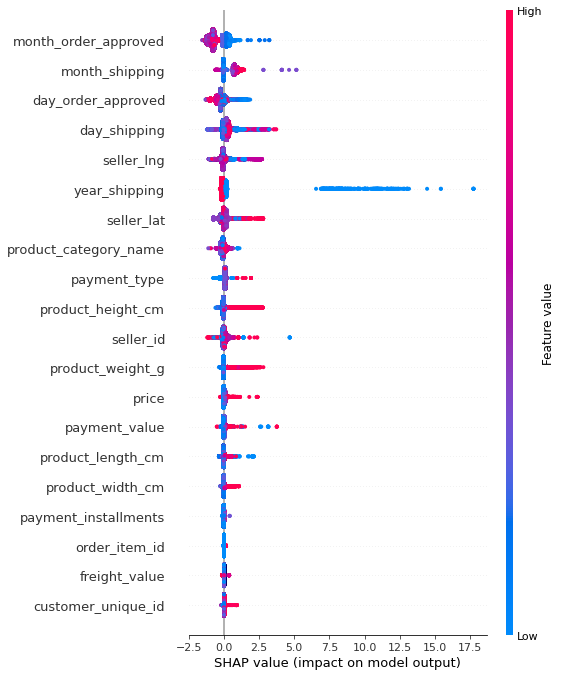

In [36]:
# visualize the overall impact of these features across multiple instances
shap.summary_plot(shap_values, X)

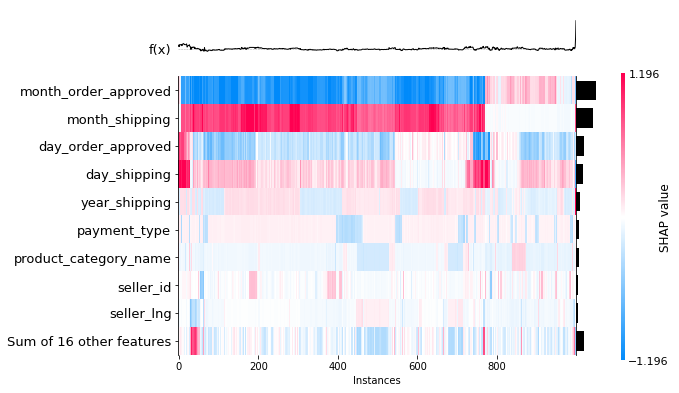

In [37]:
shap.plots.heatmap(shap_values[:1000])

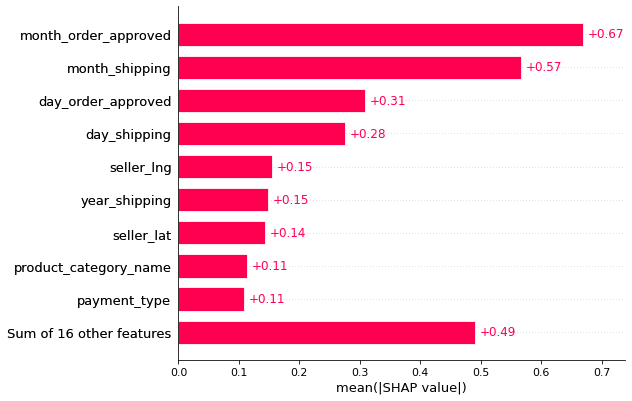

In [38]:
shap.plots.bar(shap_values)

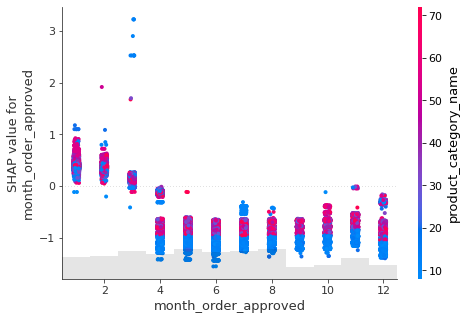

In [39]:
shap.plots.scatter(shap_values[:, "month_order_approved"], color=shap_values)

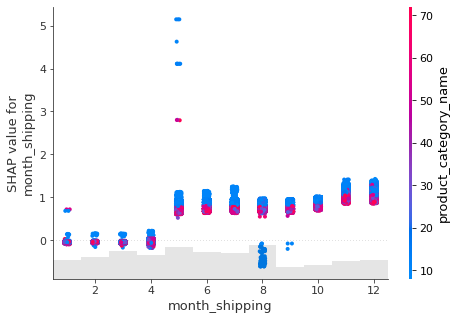

In [40]:
shap.plots.scatter(shap_values[:, "month_shipping"], color=shap_values)

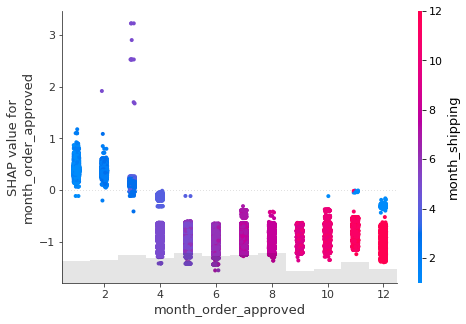

In [41]:
shap.plots.scatter(shap_values[:,"month_order_approved"], color=shap_values[:,"month_shipping"])

##GradientBoosting


In [42]:
model = GradientBoostingRegressor()

my_pipeline = Pipeline(steps=[('m', model)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error'}

scores = cross_validate(my_pipeline, 
                        X_train, Y_train,
                        cv=cv,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Gradient Boosting',
             'MAE'        : -1*np.mean(scores['test_mae'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [43]:
Metrics

,Modelo,MAE
0,LinearRegression,1.988747
1,Decision Tree,1.893243
2,Random Forest,1.956908
3,XGB,1.855939
4,Gradient Boosting,1.856235


In [44]:
model.fit(X,y)

explainer = shap.Explainer(model)
shap_values = explainer(X)

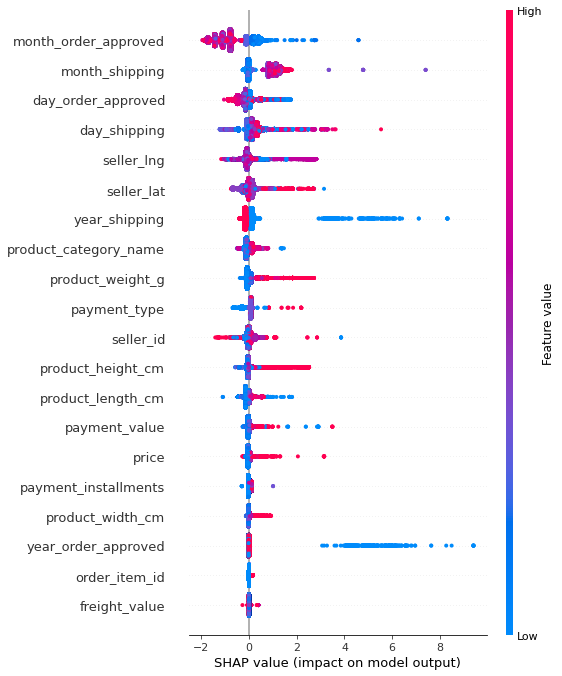

In [45]:
# visualize the overall impact of these features across multiple instances
shap.summary_plot(shap_values, X)

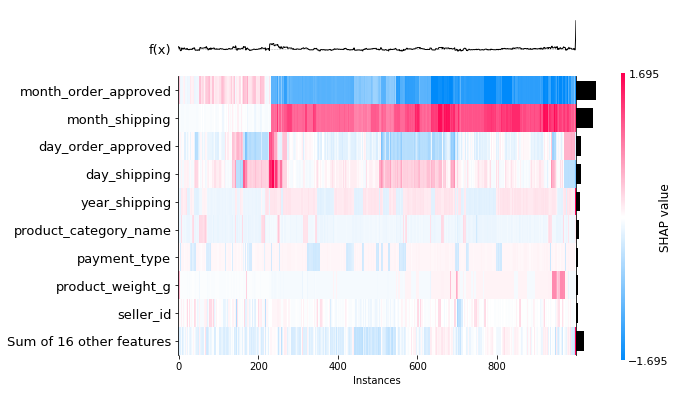

In [46]:
shap.plots.heatmap(shap_values[:1000])

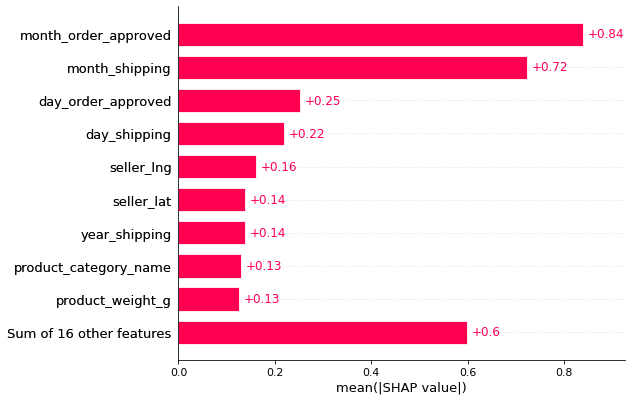

In [47]:
shap.plots.bar(shap_values)

##Histogram Gradient Boosting


In [48]:
model = HistGradientBoostingRegressor()

my_pipeline = Pipeline(steps=[('m', model)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error'}

scores = cross_validate(my_pipeline, 
                        X_test, Y_test, #test
                        cv=cv,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'HistGradientBoosting',
             'MAE'        : -1*np.mean(scores['test_mae'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [49]:
Metrics

,Modelo,MAE
0,LinearRegression,1.988747
1,Decision Tree,1.893243
2,Random Forest,1.956908
3,XGB,1.855939
4,Gradient Boosting,1.856235
5,HistGradientBoosting,1.775314


In [50]:
model.fit(X,y)

explainer = shap.Explainer(model)
shap_values = explainer(X)

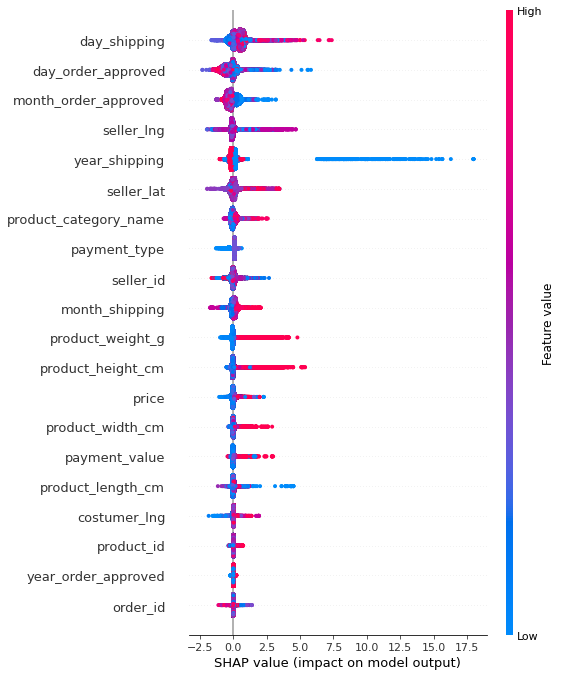

In [51]:
# visualize the overall impact of these features across multiple instances
shap.summary_plot(shap_values, X)

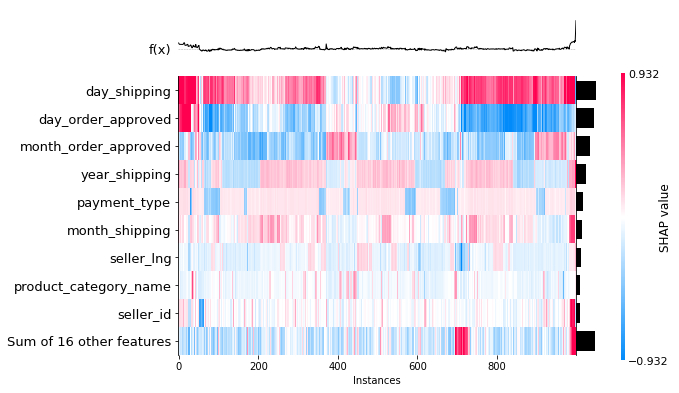

In [52]:
shap.plots.heatmap(shap_values[:1000])

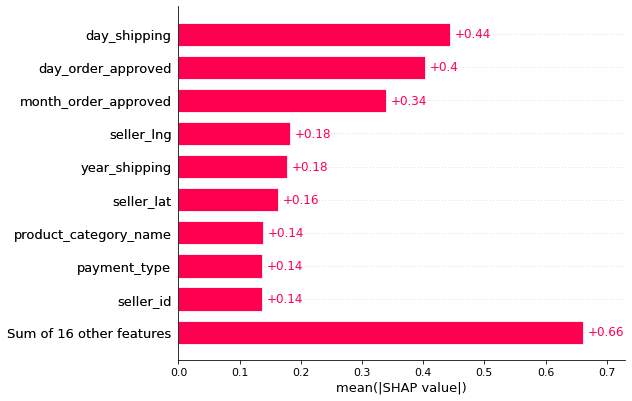

In [53]:
shap.plots.bar(shap_values)

##LightGBM

In [54]:
# lightgbm for regression

model = LGBMRegressor()

my_pipeline = Pipeline(steps=[('m', model)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Define as metricas que quer utilizar.
scoring = {'mae' :'neg_mean_absolute_error'}

scores = cross_validate(my_pipeline, 
                        X_train, Y_train, 
                        cv=cv,
                        scoring=scoring)

# Criar um dicionario com os resultados 
resultado = {'Modelo'     : 'Lightgbm',
             'MAE'        : -1*np.mean(scores['test_mae'])}

Metrics = Metrics.append(resultado,ignore_index=True)


In [55]:
Metrics

,Modelo,MAE
0,LinearRegression,1.988747
1,Decision Tree,1.893243
2,Random Forest,1.956908
3,XGB,1.855939
4,Gradient Boosting,1.856235
5,HistGradientBoosting,1.775314
6,Lightgbm,1.698196


In [56]:
model.fit(X,y)

explainer = shap.Explainer(model)
shap_values = explainer(X)

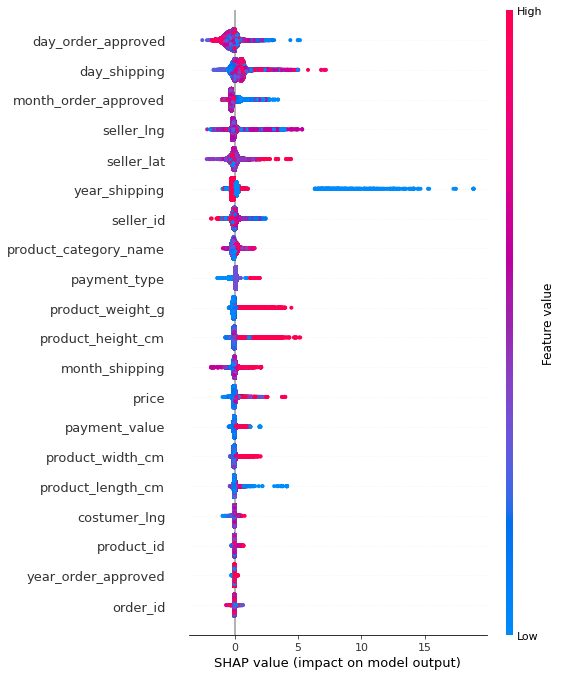

In [57]:
# visualize the overall impact of these features across multiple instances
shap.summary_plot(shap_values, X)

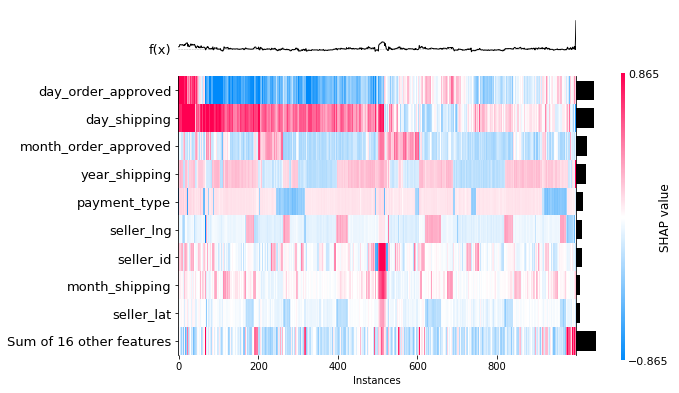

In [58]:
shap.plots.heatmap(shap_values[:1000])

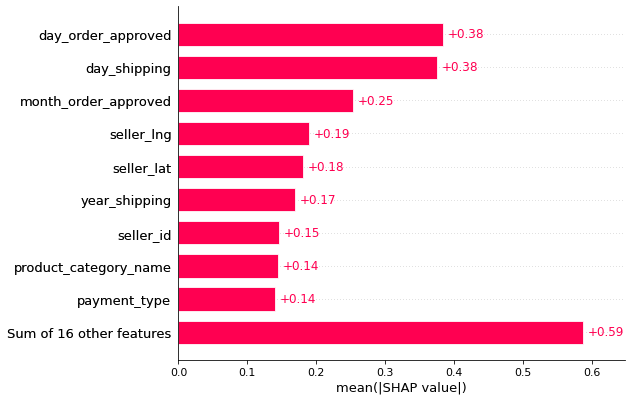

In [59]:
shap.plots.bar(shap_values)

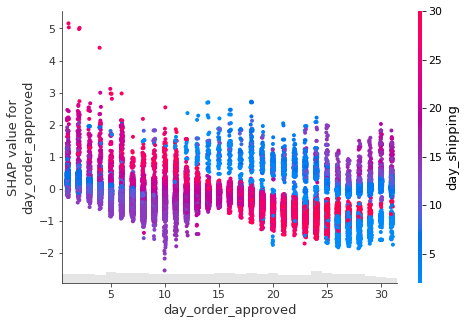

In [60]:
shap.plots.scatter(shap_values[:, "day_order_approved"], color=shap_values)

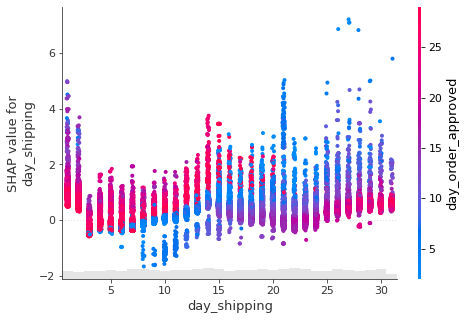

In [61]:
shap.plots.scatter(shap_values[:, "day_shipping"], color=shap_values)

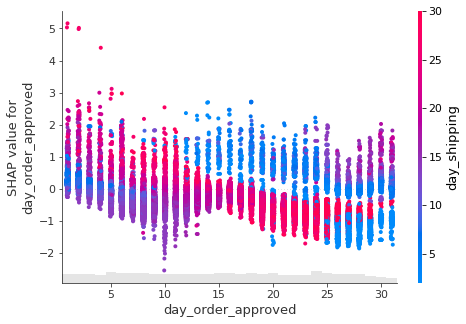

In [62]:
shap.plots.scatter(shap_values[:,"day_order_approved"], color=shap_values[:,"day_shipping"])